<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(1_6)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.6_n250.csv',
 'data_multi_delta_1.6_n120.csv',
 'data_multi_delta_1.6_n60.csv',
 'data_multi_delta_1.6_n30.csv',
 'data_multi_delta_1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,39.543895,27.146580,50.777992,49.449164,17.133675,194.051305,175.400472,18.650833
1,0.0,1.0,38.637560,97.280709,65.673756,98.347037,-27.656349,282.282714,306.973438,-24.690724
2,0.0,2.0,43.926410,93.285143,60.377118,74.171046,-5.038406,276.721312,278.006616,-1.285303
3,0.0,3.0,53.659873,57.729329,21.217383,23.965483,24.397525,190.969594,162.857854,28.111739
4,0.0,4.0,69.086778,36.462122,89.991742,37.263513,7.388792,250.192948,238.286225,11.906724
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,33.289232,59.620007,34.405060,71.612883,-19.743664,189.183518,213.116082,-23.932565
249996,999.0,246.0,49.792545,34.122474,74.807325,80.056868,-6.728010,242.051202,247.318998,-5.267797
249997,999.0,247.0,98.321861,58.097340,95.443636,68.055520,-42.992168,286.926189,322.737211,-35.811022
249998,999.0,248.0,37.424259,84.988545,95.130651,64.406514,24.503795,316.453765,290.504496,25.949269


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,39.543895,27.146580,50.777992,49.449164,17.133675,194.051305,175.400472,18.650833
1,0.0,1.0,38.637560,97.280709,65.673756,98.347037,-27.656349,282.282714,306.973438,-24.690724
2,0.0,2.0,43.926410,93.285143,60.377118,74.171046,-5.038406,276.721312,278.006616,-1.285303
3,0.0,3.0,53.659873,57.729329,21.217383,23.965483,24.397525,190.969594,162.857854,28.111739
4,0.0,4.0,69.086778,36.462122,89.991742,37.263513,7.388792,250.192948,238.286225,11.906724
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,33.289232,59.620007,34.405060,71.612883,-19.743664,189.183518,213.116082,-23.932565
249996,999.0,246.0,49.792545,34.122474,74.807325,80.056868,-6.728010,242.051202,247.318998,-5.267797
249997,999.0,247.0,98.321861,58.097340,95.443636,68.055520,-42.992168,286.926189,322.737211,-35.811022
249998,999.0,248.0,37.424259,84.988545,95.130651,64.406514,24.503795,316.453765,290.504496,25.949269


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    39.543895  27.146580  50.777992  49.449164  17.133675   
      1.0    38.637560  97.280709  65.673756  98.347037 -27.656349   
      2.0    43.926410  93.285143  60.377118  74.171046  -5.038406   
      3.0    53.659873  57.729329  21.217383  23.965483  24.397525   
      4.0    69.086778  36.462122  89.991742  37.263513   7.388792   
...                ...        ...        ...        ...        ...   
999.0 245.0  33.289232  59.620007  34.405060  71.612883 -19.743664   
      246.0  49.792545  34.122474  74.807325  80.056868  -6.728010   
      247.0  98.321861  58.097340  95.443636  68.055520 -42.992168   
      248.0  37.424259  84.988545  95.130651  64.406514  24.503795   
      249.0  80.582547  26.769722  58.265600  43.172208 -11.374026   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    194.051305  175.400472  18.650833  
      1.0    282.282714  306.973438 -24.690724  
      2.0    276.721312  278.006616  -1.285303  
      3.0    190.969594  162.857854  28.111739  
      4.0    250.192948  238.286225  11.906724  
...                 ...         ...        ...  
999.0 245.0  189.183518  213.116082 -23.932565  
      246.0  242.051202  247.318998  -5.267797  
      247.0  286.926189  322.737211 -35.811022  
      248.0  316.453765  290.504496  25.949269  
      249.0  207.416050  218.615160 -11.199110  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    39.543895  27.146580  50.777992  49.449164  17.133675   
      1.0    38.637560  97.280709  65.673756  98.347037 -27.656349   
      2.0    43.926410  93.285143  60.377118  74.171046  -5.038406   
      3.0    53.659873  57.729329  21.217383  23.965483  24.397525   
      4.0    69.086778  36.462122  89.991742  37.263513   7.388792   
...                ...        ...        ...        ...        ...   
999.0 245.0  33.289232  59.620007  34.405060  71.612883 -19.743664   
      246.0  49.792545  34.122474  74.807325  80.056868  -6.728010   
      247.0  98.321861  58.097340  95.443636  68.055520 -42.992168   
      248.0  37.424259  84.988545  95.130651  64.406514  24.503795   
      249.0  80.582547  26.769722  58.265600  43.172208 -11.374026   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    194.051305  175.400472  18.650833  
      1.0    282.282714  306.973438 -24.690724  
      2.0    276.721312  278.006616  -1.285303  
      3.0    190.969594  162.857854  28.111739  
      4.0    250.192948  238.286225  11.906724  
...                 ...         ...        ...  
999.0 245.0  189.183518  213.116082 -23.932565  
      246.0  242.051202  247.318998  -5.267797  
      247.0  286.926189  322.737211 -35.811022  
      248.0  316.453765  290.504496  25.949269  
      249.0  207.416050  218.615160 -11.199110  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,39.543895,27.146580,50.777992,49.449164,17.133675,194.051305,175.400472,18.650833
1,0.0,1.0,38.637560,97.280709,65.673756,98.347037,-27.656349,282.282714,306.973438,-24.690724
2,0.0,2.0,43.926410,93.285143,60.377118,74.171046,-5.038406,276.721312,278.006616,-1.285303
3,0.0,3.0,53.659873,57.729329,21.217383,23.965483,24.397525,190.969594,162.857854,28.111739
4,0.0,4.0,69.086778,36.462122,89.991742,37.263513,7.388792,250.192948,238.286225,11.906724
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,33.289232,59.620007,34.405060,71.612883,-19.743664,189.183518,213.116082,-23.932565
249996,999.0,246.0,49.792545,34.122474,74.807325,80.056868,-6.728010,242.051202,247.318998,-5.267797
249997,999.0,247.0,98.321861,58.097340,95.443636,68.055520,-42.992168,286.926189,322.737211,-35.811022
249998,999.0,248.0,37.424259,84.988545,95.130651,64.406514,24.503795,316.453765,290.504496,25.949269


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    39.543895  27.146580  50.777992  49.449164  17.133675   
      1.0    38.637560  97.280709  65.673756  98.347037 -27.656349   
      2.0    43.926410  93.285143  60.377118  74.171046  -5.038406   
      3.0    53.659873  57.729329  21.217383  23.965483  24.397525   
      4.0    69.086778  36.462122  89.991742  37.263513   7.388792   
...                ...        ...        ...        ...        ...   
999.0 245.0  33.289232  59.620007  34.405060  71.612883 -19.743664   
      246.0  49.792545  34.122474  74.807325  80.056868  -6.728010   
      247.0  98.321861  58.097340  95.443636  68.055520 -42.992168   
      248.0  37.424259  84.988545  95.130651  64.406514  24.503795   
      249.0  80.582547  26.769722  58.265600  43.172208 -11.374026   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    194.051305  175.400472  18.650833  
      1.0    282.282714  306.973438 -24.690724  
      2.0    276.721312  278.006616  -1.285303  
      3.0    190.969594  162.857854  28.111739  
      4.0    250.192948  238.286225  11.906724  
...                 ...         ...        ...  
999.0 245.0  189.183518  213.116082 -23.932565  
      246.0  242.051202  247.318998  -5.267797  
      247.0  286.926189  322.737211 -35.811022  
      248.0  316.453765  290.504496  25.949269  
      249.0  207.416050  218.615160 -11.199110  

[250000 rows x 8 columns]

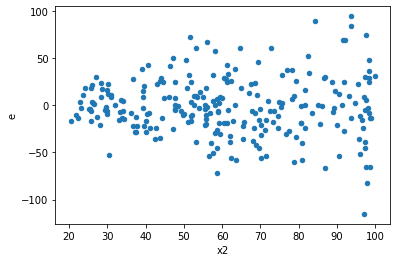

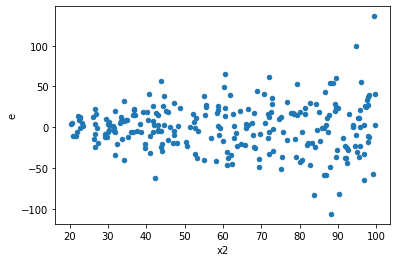

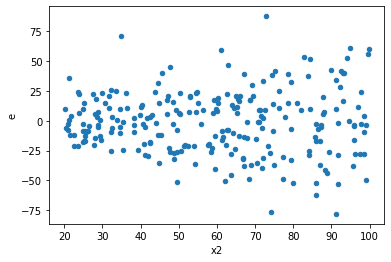

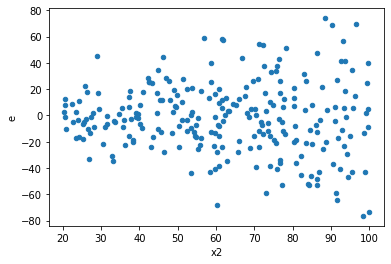

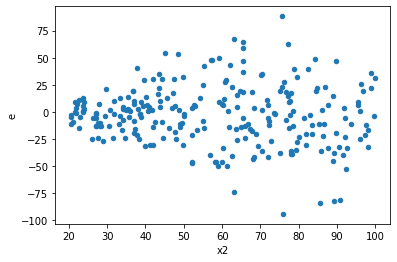

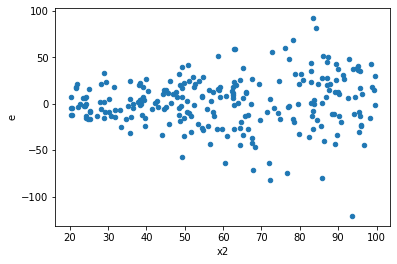

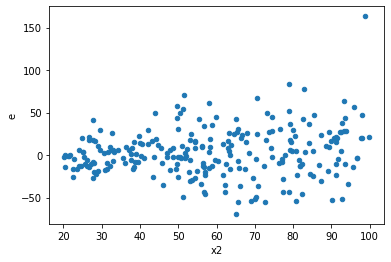

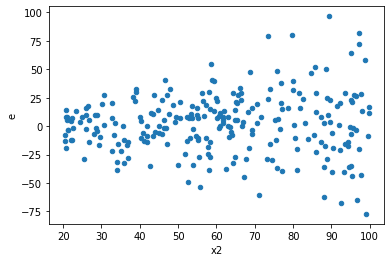

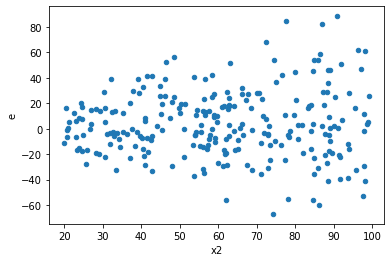

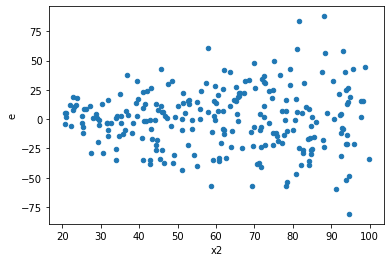

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,96.0,96.0,38446.21727796992,110034.37825903768,400.4814299788533,1146.1914401983092,2.862033928161992,4.987005939316447e-07,0.999999750649703,2.4935029696582234e-07,Reject005=0 : Heteroscedasticity
1.0,96.0,96.0,60065.55792112588,92279.44439417632,625.682895011728,961.2442124393366,1.536312116094078,0.036606917324207844,0.9816965413378961,0.018303458662103922,Reject005=0 : Heteroscedasticity
2.0,96.0,96.0,58239.396237381174,71653.45333827537,606.6603774727206,746.3901389403685,1.230326170385062,0.3115791012217759,0.844210449389112,0.15578955061088795,Reject005=1 : Homoscedasticity
3.0,96.0,96.0,28506.27908597733,60571.26854983843,296.9404071455972,630.950714060817,2.1248395263075337,0.00027199637064545534,0.9998640018146773,0.00013599818532272767,Reject005=0 : Heteroscedasticity
4.0,96.0,96.0,41260.59767078055,82099.7393552026,429.7978924039641,855.2056182833604,1.9897855094169667,0.0008695598520009895,0.9995652200739995,0.00043477992600049475,Reject005=0 : Heteroscedasticity
5.0,96.0,96.0,45444.78227239294,81971.52367194802,473.3831486707598,853.8700382494585,1.8037609506107053,0.0042121074731145125,0.9978939462634427,0.0021060537365572563,Reject005=0 : Heteroscedasticity
6.0,96.0,96.0,38333.03365894592,91823.68939507262,399.30243394735334,956.4967645320065,2.3954193193275586,2.6282827638057782e-05,0.999986858586181,1.3141413819028891e-05,Reject005=0 : Heteroscedasticity
7.0,96.0,96.0,59270.64526701547,76699.85267200576,617.4025548647445,798.9567986667266,1.2940613743358342,0.2084390490155945,0.8957804754922027,0.10421952450779726,Reject005=1 : Homoscedasticity
8.0,96.0,96.0,59037.79855981735,79919.22631332197,614.9770683314307,832.4919407637705,1.3536959077555621,0.13969278371881932,0.9301536081405903,0.06984639185940966,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,38446.21727796992,110034.37825903768,400.4814299788533,1146.1914401983092,2.862033928161992,4.987005939316447e-07,Reject005=0 : Heteroscedasticity
1.0,96.0,96.0,60065.55792112588,92279.44439417632,625.682895011728,961.2442124393366,1.536312116094078,0.036606917324207844,Reject005=0 : Heteroscedasticity
2.0,96.0,96.0,58239.396237381174,71653.45333827537,606.6603774727206,746.3901389403685,1.230326170385062,0.3115791012217759,Reject005=1 : Homoscedasticity
3.0,96.0,96.0,28506.27908597733,60571.26854983843,296.9404071455972,630.950714060817,2.1248395263075337,0.00027199637064545534,Reject005=0 : Heteroscedasticity
4.0,96.0,96.0,41260.59767078055,82099.7393552026,429.7978924039641,855.2056182833604,1.9897855094169667,0.0008695598520009895,Reject005=0 : Heteroscedasticity
5.0,96.0,96.0,45444.78227239294,81971.52367194802,473.3831486707598,853.8700382494585,1.8037609506107053,0.0042121074731145125,Reject005=0 : Heteroscedasticity
6.0,96.0,96.0,38333.03365894592,91823.68939507262,399.30243394735334,956.4967645320065,2.3954193193275586,2.6282827638057782e-05,Reject005=0 : Heteroscedasticity
7.0,96.0,96.0,59270.64526701547,76699.85267200576,617.4025548647445,798.9567986667266,1.2940613743358342,0.2084390490155945,Reject005=1 : Homoscedasticity
8.0,96.0,96.0,59037.79855981735,79919.22631332197,614.9770683314307,832.4919407637705,1.3536959077555621,0.13969278371881932,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    729
Reject005=1 : Homoscedasticity      271
Name: Result_test, dtype: int64